The data is related with direct marketing campaigns of a Portuguese banking institution. 
   The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, 
   in order to access if the product (bank term deposit) would be (or not) subscribed. 

> Number of Instances: 45211

> Number of Attributes: 16 + output attribute.


The classification goal is to predict if the client will subscribe a term deposit (variable y).


# Attribute information:
   Input variables:
  
   ## bank client data:
   
   1 - age (numeric)
  
   2 - job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student",
                                       "blue-collar","self-employed","retired","technician","services") 
   
   3 - marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)
  
   4 - education (categorical: "unknown","secondary","primary","tertiary")
   
   5 - default: has credit in default? (binary: "yes","no")
  
   6 - balance: average yearly balance, in euros (numeric) 
  
   7 - housing: has housing loan? (binary: "yes","no")
  
   8 - loan: has personal loan? (binary: "yes","no")
  
   ## related with the last contact of the current campaign:
   
   9 - contact: contact communication type (categorical: "unknown","telephone","cellular") 
  
  10 - day: last contact day of the month (numeric)
  
  11 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
  
  12 - duration: last contact duration, in seconds (numeric)
  
   ## other attributes:
  
  13 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
  
  14 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)
  
  15 - previous: number of contacts performed before this campaign and for this client (numeric)

  16 - poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")

# Output variable (desired target):

  17 - y - has the client subscribed a term deposit? (binary: "yes","no")

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [0]:
path = '/content/drive/My Drive/Datasets/Bank Marketing Data Set/bank-full.csv'
df  = pd.read_csv(path,sep=';')

In [20]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [22]:
#Dropping useless columns
df.drop(['contact','day','month'],axis=1,inplace = True)
display(df.head())

,age,job,marital,education,default,balance,housing,loan,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,198,1,-1,0,unknown,no


In [23]:
df.y.value_counts()

no     39922
yes     5289
Name: y, dtype: int64

In [0]:
dfgrouped = df.groupby('y')

In [25]:
for type,data in dfgrouped:
  print(type)
  print('--------------')
  print(data)

no
--------------
       age           job  marital  education  ... pdays  previous poutcome   y
0       58    management  married   tertiary  ...    -1         0  unknown  no
1       44    technician   single  secondary  ...    -1         0  unknown  no
2       33  entrepreneur  married  secondary  ...    -1         0  unknown  no
3       47   blue-collar  married    unknown  ...    -1         0  unknown  no
4       33       unknown   single    unknown  ...    -1         0  unknown  no
...    ...           ...      ...        ...  ...   ...       ...      ...  ..
45194   59    management  married   tertiary  ...   187         5  failure  no
45198   37    management  married   tertiary  ...    -1         0  unknown  no
45199   34   blue-collar   single  secondary  ...   530        12    other  no
45209   57   blue-collar  married  secondary  ...    -1         0  unknown  no
45210   37  entrepreneur  married  secondary  ...   188        11    other  no

[39922 rows x 14 columns]
yes
---

In [0]:
def plot_barh(array,incrementer, bias, text_color ='blue', palette_style = 'darkgrid',palette_color = 'RdBu'):

  sns.set_style(palette_style)
  sns.set_palette(palette_color)

  plt.barh(array.index, width = array.values, height = .5)
  plt.yticks(np.arange(len(array)))
  plt.xticks( range(0, round(max(array)) +bias, incrementer ))

  for index, value in enumerate(array.values):
    plt.text(value +.5, index, s= '{:.1f}%'.format(value), color = text_color)

  plt.show()

In [0]:
def feature_perc(feature,groupby= 'yes'):

  count = dfgrouped.get_group(groupby)[feature].value_counts()
  total_count = df[feature].value_counts()[count.index]

  perc = (count/total_count)*100
  return perc 

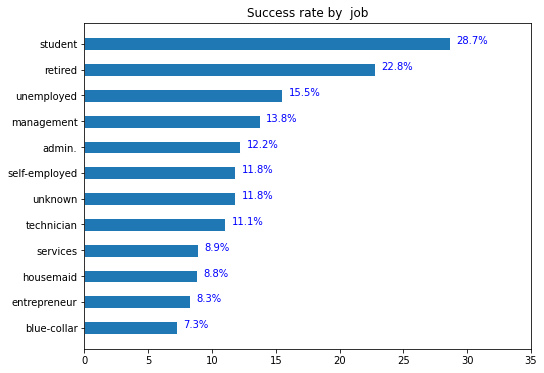

In [12]:
yes_job_perc = feature_perc('job')

plt.figure(figsize=(8,6))
plt.title('Success rate by  job')
plot_barh(yes_job_perc.sort_values(),5,10, text_color = 'blue')

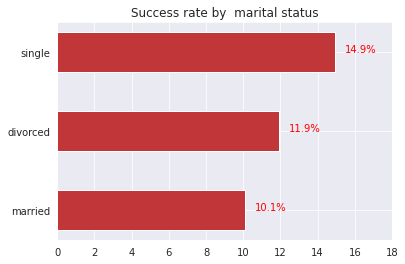

In [13]:
yes_marital_perc = feature_perc('marital')

plt.title('Success rate by  marital status')
plot_barh(yes_marital_perc.sort_values(),2,4, text_color = 'red',palette_color='dark')

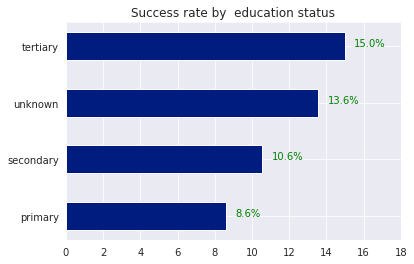

In [14]:
yes_marital_perc = feature_perc('education')

plt.title('Success rate by  education status')
plot_barh(yes_marital_perc.sort_values(),2,4, text_color = 'green',palette_color='Oranges')

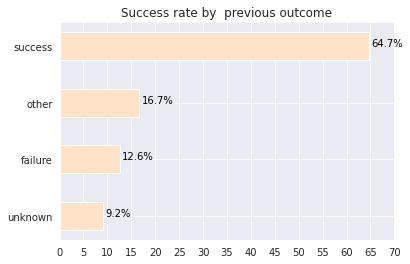

In [15]:
yes_potcome_perc = feature_perc('poutcome')

plt.title('Success rate by  previous outcome')
plot_barh(yes_potcome_perc.sort_values(),5,10, text_color = 'black',palette_color='dark')

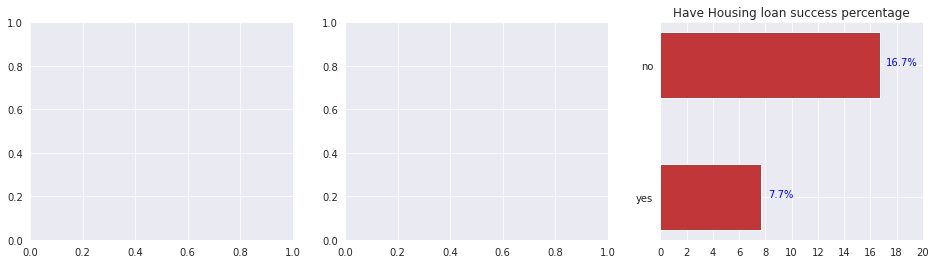

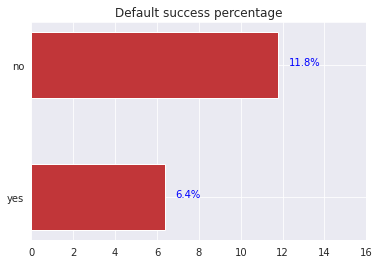

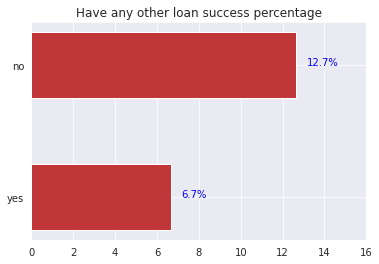

In [40]:
yes_housing_perc = feature_perc('housing')
yes_default_perc = feature_perc('default')
yes_loan_perc = feature_perc('loan')

fig, (ax1,ax2,ax3) = plt.subplots(1,3, figsize=(16,4))

ax1 = plt.title('Have Housing loan success percentage')
ax1 = plot_barh( yes_housing_perc.sort_values(), 2, 5)

ax2 = plt.title('Default success percentage')
ax2 = plot_barh( yes_default_perc.sort_values(), 2, 5)

ax3 = plt.title('Have any other loan success percentage')
ax3 = plot_barh( yes_loan_perc.sort_values(), 2, 5)

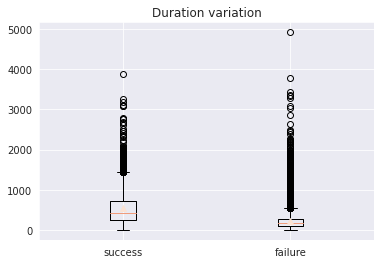

In [30]:
plt.boxplot( [dfgrouped.get_group('yes')['duration'], dfgrouped.get_group('no')['duration']], labels= ['success','failure'], showmeans=True)
plt.title('Duration variation')

plt.show()

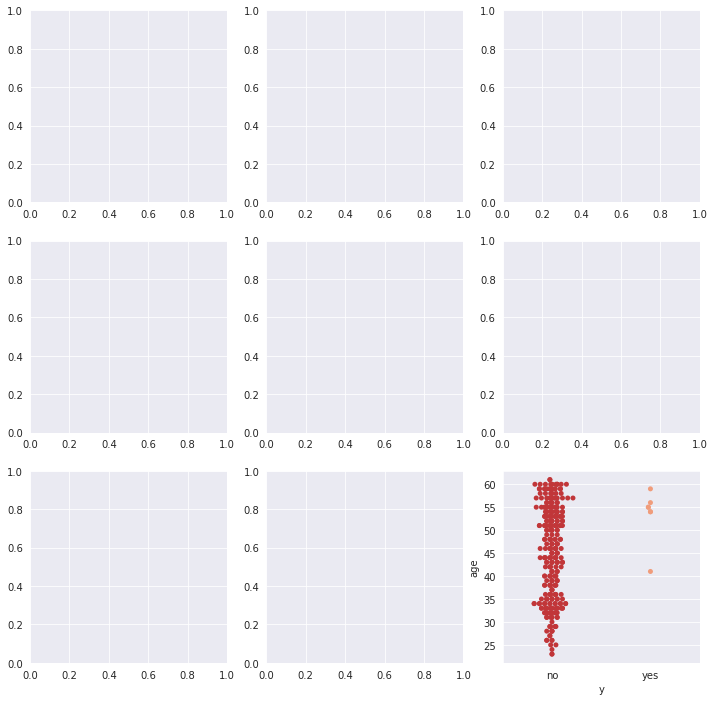

In [39]:
sns.set_style('darkgrid')
fig,ax = plt.subplots(3,3, figsize = (12,12))

ax[0,0] = sns.swarmplot(x='y', y='age', data=df.iloc[:100])
ax[0,1] = sns.swarmplot(x='y', y='age', data=df.iloc[101:200])
ax[1,2] = sns.swarmplot(x='y', y='age', data=df.iloc[101:200])
plt.show()

In [0]:
df['y'] = df.y.apply(lambda x:0 if x=='no' else 1)

In [0]:
df.head()

In [0]:
dummy_features = ['job','marital','education','default','housing','loan','poutcome']
df1 = pd.get_dummies(df[dummy_features])
df2 = pd.concat([df.drop(dummy_features,axis=1),df1],axis=1)

In [0]:
df2.head()

In [0]:
df2.corr()['y'].sort_values()

In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [0]:
X_train, X_test, y_train, y_test = train_test_split(df2.drop('y',axis=1),
                                                    df2['y'],
                                                    test_size=.3, random_state = 42,
                                                    stratify= df2['y'])

In [0]:
stsc = StandardScaler()
s_X_train = stsc.fit_transform(X_train)
s_X_test = stsc.transform(X_test)

In [0]:
#model = LogisticRegression()
#model = SVC()
model = RandomForestClassifier()
model.fit(s_X_train,y_train)

In [0]:
model.score(s_X_train,y_train)

In [0]:
model.score(s_X_test,y_test)

In [0]:
confusion_matrix(y_train, model.predict(s_X_train))

In [0]:
print(classification_report(y_train, model.predict(s_X_train)))

In [0]:
confusion_matrix(y_test, model.predict(s_X_test))

In [0]:
print(classification_report(y_test, model.predict(s_X_test)))